In [1]:
.libPaths()

[1] "C:/Program Files/R/R-3.5.1/library"

In [1]:
pacman::p_load(rgdal, plm, splm, spdep, dplyr, zoo)

In [2]:
#Filepaths
work <- "D:"
laptop <- "C:\\Users\\jerem"
origin = laptop

In [34]:
# Input shapefile
myshp  <-readOGR(dsn="D:\\Box Sync\\Policy Evaluation\\working_data\\analytical_panel_shapefile\\analytical_panel_qt_shapefile_thiessen_polygons_clipped_manhattan.shp",layer="analytical_panel_qt_shapefile_thiessen_polygons_clipped_manhattan")


OGR data source with driver: ESRI Shapefile 
Source: "D:\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile_thiessen_polygons_clipped_manhattan.shp", layer: "analytical_panel_qt_shapefile_thiessen_polygons_clipped_manhattan"
with 68400 features
It has 31 fields


In [35]:
names(myshp)

[1] "collision_" "personsinj" "pedestrian" "cyclistinj" "motoristin"
 [6] "bronx"      "brooklyn"   "manhattan"  "queens"     "statenisla"
[11] "distance_t" "distance_1" "distance_2" "distance_3" "distance_4"
[16] "distance_5" "flag_left_" "flag_lef_1" "flag_LPIS_" "flag_LPIS" 
[21] "bike_route" "bike_rou_1" "flag_senio" "flag_prior" "flag_schoo"
[26] "flag_stree" "quarter"    "year"       "intersecti" "y"         
[31] "x"

In [36]:
summary(myshp)

Object of class SpatialPolygonsDataFrame
Coordinates:
        min       max
x -74.01960 -73.90705
y  40.69931  40.87833
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0]
Data attributes:
   collision_       personsinj        pedestrian        cyclistinj     
 Min.   : 0.000   Min.   : 0.0000   Min.   : 0.0000   Min.   :0.00000  
 1st Qu.: 0.000   1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.:0.00000  
 Median : 2.000   Median : 0.0000   Median : 0.0000   Median :0.00000  
 Mean   : 2.525   Mean   : 0.4516   Mean   : 0.1613   Mean   :0.07566  
 3rd Qu.: 4.000   3rd Qu.: 1.0000   3rd Qu.: 0.0000   3rd Qu.:0.00000  
 Max.   :49.000   Max.   :31.0000   Max.   :29.0000   Max.   :5.00000  
   motoristin          bronx      brooklyn   manhattan     queens    statenisla
 Min.   : 0.0000   Min.   :0   Min.   :0   Min.   :1   Min.   :0   Min.   :0   
 1st Qu.: 0.0000   1st Qu.:0   1st Qu.:0   1st Qu.:1   1st Qu.:0   1st Qu.:0   
 Median : 0.0000  

In [37]:
names(myshp)

[1] "collision_" "personsinj" "pedestrian" "cyclistinj" "motoristin"
 [6] "bronx"      "brooklyn"   "manhattan"  "queens"     "statenisla"
[11] "distance_t" "distance_1" "distance_2" "distance_3" "distance_4"
[16] "distance_5" "flag_left_" "flag_lef_1" "flag_LPIS_" "flag_LPIS" 
[21] "bike_route" "bike_rou_1" "flag_senio" "flag_prior" "flag_schoo"
[26] "flag_stree" "quarter"    "year"       "intersecti" "y"         
[31] "x"

In [38]:
names(myshp) <- c("collision_count","personsinjured","pedestriansinjured","cyclistinjured","motoristinjured","bronx","brooklyn","manhattan","queens","statenisland","distance_to_LPIS","distance_to_Street","distance_to_Sch","distance_to_LTC","distance_to_bikeroute","distance_to_truckroute","flag_left_turn_ever","flag_left_turn","flag_LPIS_ever","flag_LPIS","bike_route_tv","bike_route_ever", "flag_seniors","flag_priorityinters","flag_school","flag_street_improv", "quarter","year","intersection_id","y","x")

In [39]:
names(myshp)

[1] "collision_count"        "personsinjured"         "pedestriansinjured"    
 [4] "cyclistinjured"         "motoristinjured"        "bronx"                 
 [7] "brooklyn"               "manhattan"              "queens"                
[10] "statenisland"           "distance_to_LPIS"       "distance_to_Street"    
[13] "distance_to_Sch"        "distance_to_LTC"        "distance_to_bikeroute" 
[16] "distance_to_truckroute" "flag_left_turn_ever"    "flag_left_turn"        
[19] "flag_LPIS_ever"         "flag_LPIS"              "bike_route_tv"         
[22] "bike_route_ever"        "flag_seniors"           "flag_priorityinters"   
[25] "flag_school"            "flag_street_improv"     "quarter"               
[28] "year"                   "intersection_id"        "y"                     
[31] "x"

In [41]:
# Check that year is correctly formatted
table(myshp@data$year)


 2012  2013  2014  2015  2016  2017  2018 
 5472 10944 10944 10944 10944 10944  8208 

In [42]:
# Create time variable in mydata
myshp@data$x <- paste(as.character(myshp@data$year) , as.character(myshp@data$quarter))
myshp@data$quarter_year <- as.yearqtr(format(myshp@data$x), "%Y%q")

In [43]:
# Check that quarter_year is correctly formatted
table(myshp@data$quarter_year)


2012 Q3 2012 Q4 2013 Q1 2013 Q2 2013 Q3 2013 Q4 2014 Q1 2014 Q2 2014 Q3 2014 Q4 
   2736    2736    2736    2736    2736    2736    2736    2736    2736    2736 
2015 Q1 2015 Q2 2015 Q3 2015 Q4 2016 Q1 2016 Q2 2016 Q3 2016 Q4 2017 Q1 2017 Q2 
   2736    2736    2736    2736    2736    2736    2736    2736    2736    2736 
2017 Q3 2017 Q4 2018 Q1 2018 Q2 2018 Q3 
   2736    2736    2736    2736    2736 

In [44]:
typeof(myshp@data$quarter_year)

[1] "double"

In [45]:
# Sort my panel by intersection first, then time
myshp@data <- myshp@data[order(myshp@data$quarter_year,myshp@data$intersection_id),]

In [46]:
head(myshp@data)


,collision_count,personsinjured,pedestriansinjured,cyclistinjured,motoristinjured,bronx,brooklyn,manhattan,queens,statenisland,...,flag_seniors,flag_priorityinters,flag_school,flag_street_improv,quarter,year,intersection_id,y,x,quarter_year
12,6,1,1,0,0,0,0,1,0,0,...,1,1,0,0,3,2012,1,199793.6,2012 3,2012 Q3
37,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,2012,2,202206.2,2012 3,2012 Q3
62,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,2012,3,201790.1,2012 3,2012 Q3
87,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,2012,4,201530.0,2012 3,2012 Q3
112,5,1,0,0,1,0,0,1,0,0,...,0,0,0,0,3,2012,5,201226.1,2012 3,2012 Q3
137,7,1,1,0,0,0,0,1,0,0,...,1,0,0,0,3,2012,6,200696.0,2012 3,2012 Q3


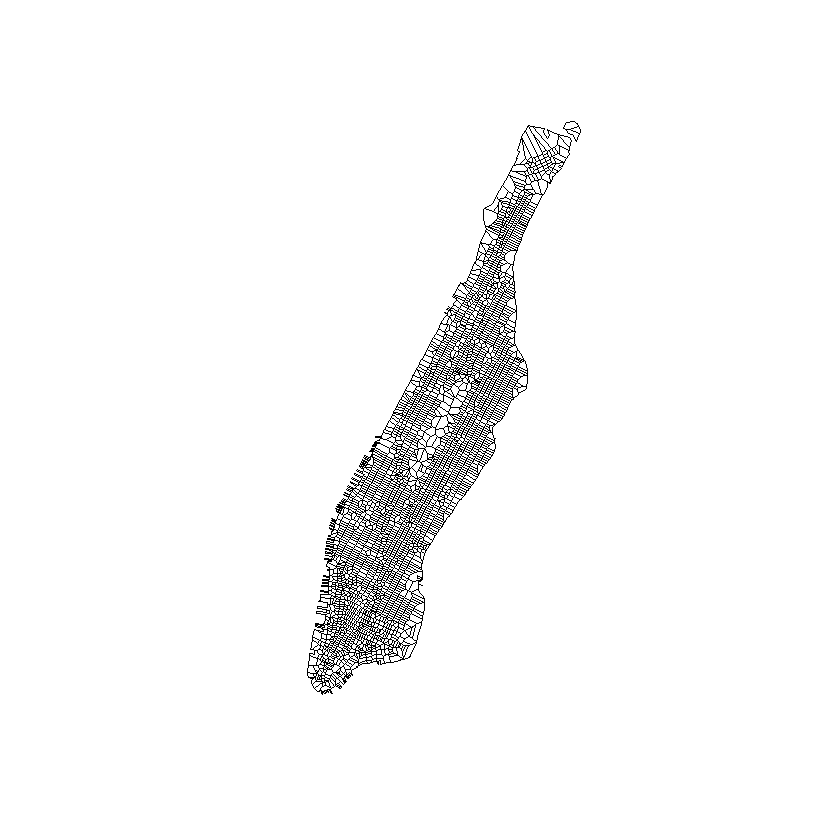

In [47]:
plot(myshp)

In [48]:
# Set new df from myshp so that I can run plm and splm later
mydata <- as.data.frame(myshp@data)

In [49]:
# Check that they are the same in both datasets
summary(mydata$flag_LPIS )
summary(myshp@data$flag_LPIS )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.07547 0.00000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.07547 0.00000 1.00000 

In [50]:
## reorder variables
# Move intersection id and year_quarter to first column of dataframe
# %>% is a pipe operator, it is used to execute several commands in one command

mydata <- dplyr::select(mydata,intersection_id, quarter_year, everything())

In [51]:
head(mydata)

,intersection_id,quarter_year,collision_count,personsinjured,pedestriansinjured,cyclistinjured,motoristinjured,bronx,brooklyn,manhattan,...,bike_route_tv,bike_route_ever,flag_seniors,flag_priorityinters,flag_school,flag_street_improv,quarter,year,y,x
12,1,2012 Q3,6,1,1,0,0,0,0,1,...,1,1,1,1,0,0,3,2012,199793.6,2012 3
37,2,2012 Q3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,3,2012,202206.2,2012 3
62,3,2012 Q3,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,3,2012,201790.1,2012 3
87,4,2012 Q3,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,3,2012,201530.0,2012 3
112,5,2012 Q3,5,1,0,0,1,0,0,1,...,0,1,0,0,0,0,3,2012,201226.1,2012 3
137,6,2012 Q3,7,1,1,0,0,0,0,1,...,0,0,1,0,0,0,3,2012,200696.0,2012 3


In [52]:
model = collision_count~flag_LPIS+factor(quarter_year)+bike_route_tv+flag_street_improv+flag_left_turn+flag_school*factor(quarter_year)+flag_priorityinters*factor(quarter_year)+flag_seniors*factor(quarter_year)

In [53]:
## Linear regression 
ols <- lm(model,data=mydata)
summary(ols)


Call:
lm(formula = model, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.929  -1.924  -0.844   1.011  44.132 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                      2.610374   0.073132  35.694
flag_LPIS                                        0.404114   0.048877   8.268
factor(quarter_year)2012 Q4                     -0.278644   0.102727  -2.712
factor(quarter_year)2013 Q1                     -0.440737   0.102727  -4.290
factor(quarter_year)2013 Q2                      0.028975   0.102727   0.282
factor(quarter_year)2013 Q3                     -0.058535   0.102728  -0.570
factor(quarter_year)2013 Q4                     -0.095810   0.102729  -0.933
factor(quarter_year)2014 Q1                     -0.474298   0.102729  -4.617
factor(quarter_year)2014 Q2                     -0.006412   0.102731  -0.062
factor(quarter_year)2014 Q3                     -0.052079   0.102732  -0.507
fa

In [54]:
# Fixed effects Linear panel regression
fe <- plm(model, data = mydata, index = c("intersection_id","quarter_year"), model = "within")
summary(fe)

Oneway (individual) effect Within Model

Call:
plm(formula = model, data = mydata, model = "within", index = c("intersection_id", 
    "quarter_year"))

Balanced Panel: n = 2736, T = 25, N = 68400

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-13.41596  -0.95777  -0.16430   0.79570  23.34539 

Coefficients:
                                                  Estimate Std. Error  t-value
flag_LPIS                                       -0.0890491  0.0380488  -2.3404
factor(quarter_year)2012 Q4                     -0.2761611  0.0610978  -4.5200
factor(quarter_year)2013 Q1                     -0.4382398  0.0610977  -7.1728
factor(quarter_year)2013 Q2                      0.0326441  0.0611000   0.5343
factor(quarter_year)2013 Q3                     -0.0533507  0.0611034  -0.8731
factor(quarter_year)2013 Q4                     -0.0883107  0.0611142  -1.4450
factor(quarter_year)2014 Q1                     -0.4661595  0.0611143  -7.6277
factor(quarter_year)2014 Q2               

In [55]:
pFtest(fe, ols) 


	F test for individual effects

data:  model
F = 46.676, df1 = 2732, df2 = 65564, p-value < 2.2e-16
alternative hypothesis: significant effects


In [56]:
# Random effects Linear panel regression
re <- plm(model, data = mydata, index = c("intersection_id","quarter_year"), model = "random")
summary(re)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = model, data = mydata, model = "random", index = c("intersection_id", 
    "quarter_year"))

Balanced Panel: n = 2736, T = 25, N = 68400

Effects:
                var std.dev share
idiosyncratic 3.516   1.875 0.359
individual    6.274   2.505 0.641
theta: 0.8519

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-11.05516  -1.03055  -0.29128   0.72121  25.17014 

Coefficients:
                                                  Estimate Std. Error  t-value
(Intercept)                                      2.6677704  0.0738338  36.1321
flag_LPIS                                       -0.0718526  0.0377779  -1.9020
factor(quarter_year)2012 Q4                     -0.2766825  0.0611402  -4.5254
factor(quarter_year)2013 Q1                     -0.4387618  0.0611402  -7.1763
factor(quarter_year)2013 Q2                      0.0319220  0.0611420   0.5221
factor(quarter_year)2013 Q3     

In [57]:
# Hausman test
phtest(fe, re)


	Hausman Test

data:  model
chisq = 117.89, df = 100, p-value = 0.1069
alternative hypothesis: one model is inconsistent


Hausman test is no longer significant.

In [62]:
#Create cross section of panel data
subset.myshp <- myshp[ which(myshp$quarter_year=='2014 Q3'), ]

In [63]:
table(subset.myshp@data$quarter_year)


2014 Q3 
   2736 

In [64]:
summary(subset.myshp)

Object of class SpatialPolygonsDataFrame
Coordinates:
        min       max
x -74.00293 -73.97309
y  40.73353  40.76794
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0]
Data attributes:
 collision_count  personsinjured    pedestriansinjured cyclistinjured  
 Min.   : 0.000   Min.   : 0.0000   Min.   : 0.000     Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.: 0.0000   1st Qu.: 0.000     1st Qu.:0.0000  
 Median : 2.000   Median : 0.0000   Median : 0.000     Median :0.0000  
 Mean   : 2.953   Mean   : 0.5095   Mean   : 0.155     Mean   :0.1155  
 3rd Qu.: 4.000   3rd Qu.: 1.0000   3rd Qu.: 0.000     3rd Qu.:0.0000  
 Max.   :36.000   Max.   :15.0000   Max.   :13.000     Max.   :5.0000  
 motoristinjured      bronx      brooklyn   manhattan     queens   statenisland
 Min.   : 0.000   Min.   :0   Min.   :0   Min.   :1   Min.   :0   Min.   :0    
 1st Qu.: 0.000   1st Qu.:0   1st Qu.:0   1st Qu.:1   1st Qu.:0   1st Qu.:0    
 Median : 0.000   

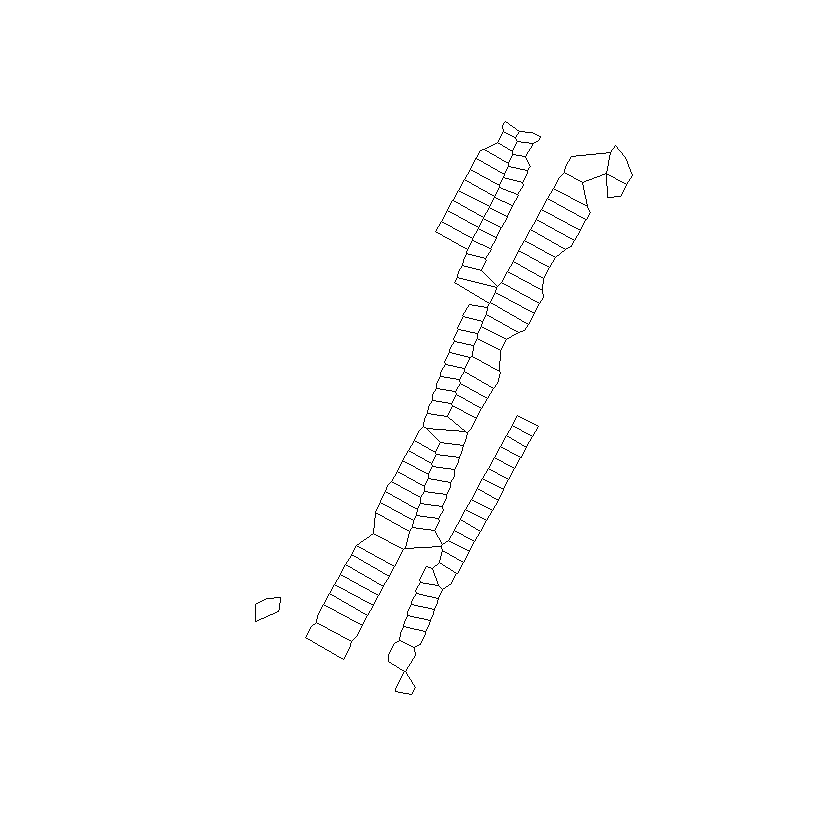

In [65]:
plot(subset.myshp)

In [32]:
# Calculate contiguity queen neighbors
myshp_nb <- poly2nb(subset.myshp, queen = TRUE)

In [33]:
summary(myshp_nb)

Neighbour list object:
Number of regions: 12987 
Number of nonzero links: 77720 
Percentage nonzero weights: 0.04608028 
Average number of links: 5.984446 
Link number distribution:

   2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17 
   3   66 1470 3544 4144 2278  825  359  160   69   30   15   12    7    2    1 
  19   20 
   1    1 
3 least connected regions:
2769 10139 12801 with 2 links
1 most connected region:
5579 with 20 links


In [34]:
 myshp_nb_w <- nb2listw(myshp_nb,glist=NULL,style="W",zero.policy=FALSE) 

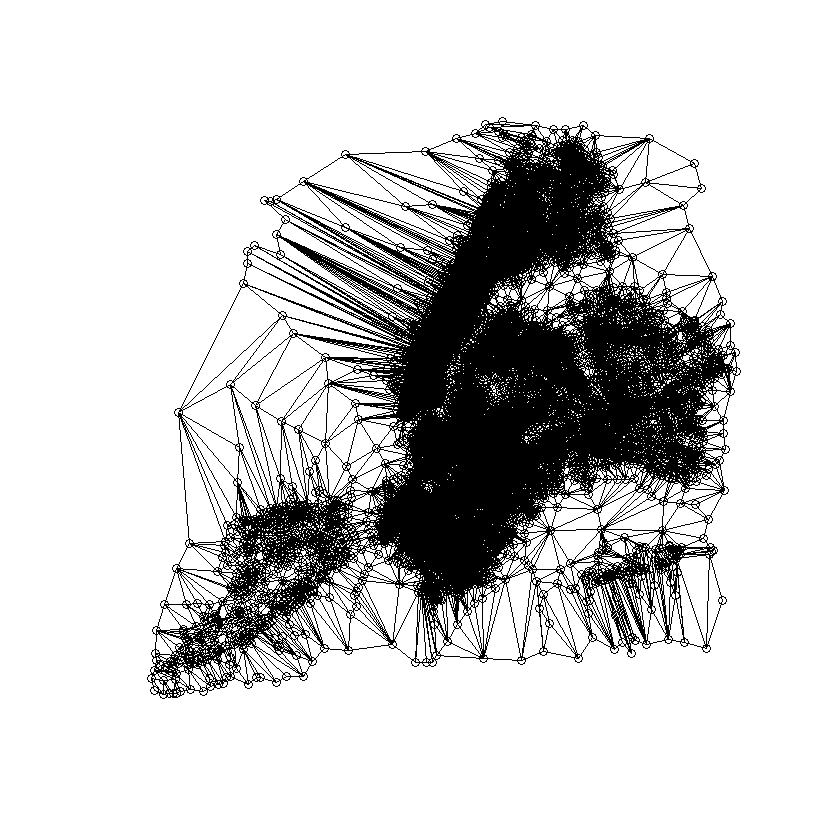

In [35]:
plot(myshp_nb_w,coordinates(subset.myshp))


In [36]:
model2 = collision_count~flag_LPIS
model = collision_count~flag_LPIS+factor(quarter_year)+bike_route_tv+flag_street_improv+flag_left_turn+flag_school*factor(quarter_year)+flag_priorityinters*factor(quarter_year)+flag_seniors*factor(quarter_year)

In [37]:
fespaterr <- spml(model2, data = mydata, listw = myshp_nb_w, index = c("intersection_id","quarter_year"),
                   model="within", spatial.error="b", lag = FALSE)
summary(fespaterr)

Spatial panel fixed effects error model
 

Call:
spml(formula = model2, data = mydata, index = c("intersection_id", 
    "quarter_year"), listw = myshp_nb_w, model = "within", lag = FALSE, 
    spatial.error = "b")

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-17.360  -0.760  -0.040   0.520  61.572 

Spatial error parameter:
     Estimate Std. Error t-value  Pr(>|t|)    
rho 0.2046916  0.0027504  74.424 < 2.2e-16 ***

Coefficients:
           Estimate Std. Error t-value  Pr(>|t|)    
flag_LPIS -0.411646   0.014458 -28.471 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [ ]:
impacts(fespaterr,listw = myshp_nb_w, time = 25)

In [ ]:
fespatlag <- spml(model2, data = mydata, listw = myshp_nb_w, index = c("intersection_id","quarter_year"),
                   model="within", lag = TRUE)
summary(fespatlag)

In [ ]:
#The alternative hypothesis is one of no random regional effects
bsktest(x = model2, data = mydata, index = c("intersection_id","quarter_year"), listw = myshp_nb_w, test = "LM1")

In [ ]:
#The alternative hypothesis is one of no random regional effects
bsktest(x = model2, data = mydata, index = c("intersection_id","quarter_year"), listw = myshp_nb_w,test = "LM2")

In [ ]:
#check for spatial correlation in the errors of a model that possibly incorporates random effects
bsktest(x = model2, data = mydata, index = c("intersection_id","quarter_year"), listw =myshp_nb_w, test = "CLMlambda")

#spatial hausman 
sphtest(x = model2, data = mydata, listw = myshp_nb_w, index = c("intersection_id","quarter_year"), 
        spatial.model = "error", method = "GM")

mod1 <- spgm(formula = fm, data = mydata, index = c("intersection_id","quarter_year"), listw = myshp_nb_w, lag = TRUE, moments = "fullweights", model = "random", spatial.error = TRUE)
mod2 <- spgm(formula = fm, data = mydata, index = c("intersection_id","quarter_year"), listw = myshp_nb_w, lag = TRUE, model = "within", spatial.error = TRUE)
test2 <- sphtest(x = mod1, x2 = mod2)
test2

In [ ]:
memory.limit()